Each training and test example is assigned to one of the following labels:

0) T-shirt/top
1) Trouser
2) Pullover
3) Dress
4) Coat
5) Sandal
6) Shirt
7) Sneaker
8) Bag
9) Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
data = pd.read_csv("fashion-mnist_train.csv")

# Explore Data

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(60000, 785)

In [5]:
data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
data.isna().sum().max()

0

In [7]:
data.duplicated().sum()

43

# Preprocessing

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
x = data.drop(columns=['label'], axis=1)
y = data['label']

In [10]:
Min_Max_Scaler = MinMaxScaler()
x = Min_Max_Scaler.fit_transform(x)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
y.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

# ANN Models

In [13]:
model1 = Sequential([
    Dense(512, activation='relu', input_dim=784),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [14]:
history1 = model1.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6516 - loss: 1.0612 - val_accuracy: 0.8150 - val_loss: 0.4928
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7940 - loss: 0.5926 - val_accuracy: 0.8273 - val_loss: 0.4722
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8051 - loss: 0.5505 - val_accuracy: 0.8452 - val_loss: 0.4262
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8096 - loss: 0.5379 - val_accuracy: 0.8497 - val_loss: 0.4156
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8222 - loss: 0.5083 - val_accuracy: 0.8474 - val_loss: 0.4032
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8261 - loss: 0.4980 - val_accuracy: 0.8526 - val_loss: 0.4031
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8314 - loss: 0.4771 - val_accuracy: 0.8566 - val_loss: 0.3945
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8338 - l

In [15]:
model2 = Sequential([
        Dense(512, activation='relu', input_dim=784),
        Dropout(0.3),

        Dense(256, activation='relu'),
        Dropout(0.3),

        Dense(64, activation='relu'),
        
        Dense(10, activation='softmax')
    ])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Categorical_entropy and binary_crossentropy didn't work
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,346 (2.10 MB)

 Trainable params: 550,346 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history2 = model2.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7134 - loss: 0.7813 - val_accuracy: 0.8371 - val_loss: 0.4352
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8350 - loss: 0.4599 - val_accuracy: 0.8528 - val_loss: 0.4023
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8458 - loss: 0.4143 - val_accuracy: 0.8580 - val_loss: 0.3849
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8544 - loss: 0.3991 - val_accuracy: 0.8552 - val_loss: 0.3817
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8598 - loss: 0.3812 - val_accuracy: 0.8744 - val_loss: 0.3478
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8654 - loss: 0.3675 - val_accuracy: 0.8705 - val_loss: 0.3533
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8733 - loss: 0.3440 - val_accuracy: 0.8770 - val_loss: 0.3432
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8753 - loss: 0.34

In [17]:
model3 = Sequential([
        Dense(1024, activation='relu', input_dim=784),
        Dropout(0.4),

        Dense(256, activation='relu'),
        Dropout(0.4),

        Dense(128, activation='relu'),
        Dropout(0.4),

        Dense(10, activation='softmax')
    ])

model3.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,100,426 (4.20 MB)

 Trainable params: 1,100,426 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6272 - loss: 1.0456 - val_accuracy: 0.8325 - val_loss: 0.4709
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8140 - loss: 0.5304 - val_accuracy: 0.8483 - val_loss: 0.4158
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8342 - loss: 0.4585 - val_accuracy: 0.8595 - val_loss: 0.3892
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8457 - loss: 0.4296 - val_accuracy: 0.8660 - val_loss: 0.3677
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8576 - loss: 0.3999 - val_accuracy: 0.8677 - val_loss: 0.3652
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8617 - loss: 0.3867 - val_accuracy: 0.8718 - val_loss: 0.3501
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8639 - loss: 0.3765 - val_accuracy: 0.8657 - val_loss: 0.3653
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8732 -

In [19]:
model4 = Sequential([
    Dense(512, activation='sigmoid', input_dim=784, kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(128, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model4.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,490 (1.82 MB)

 Trainable params: 476,490 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history4 = model4.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2737 - loss: 2.5229 - val_accuracy: 0.6964 - val_loss: 1.2025
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6119 - loss: 1.3924 - val_accuracy: 0.7496 - val_loss: 1.0184
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6734 - loss: 1.2168 - val_accuracy: 0.7618 - val_loss: 0.9484
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6930 - loss: 1.1321 - val_accuracy: 0.7688 - val_loss: 0.9138
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7099 - loss: 1.0942 - val_accuracy: 0.7671 - val_loss: 0.8927
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7177 - loss: 1.0503 - val_accuracy: 0.7678 - val_loss: 0.8719
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7134 - loss: 1.0520 - val_accuracy: 0.7764 - val_loss: 0.8567
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7181 - loss:

# Predictions

In [28]:
test = pd.read_csv('fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test.shape

(10000, 785)

In [30]:
x_test = test.drop(columns='label')
y_test = test.label

In [31]:
Min_Max_Scaler = MinMaxScaler()
x_test = Min_Max_Scaler.fit_transform(x_test)

In [68]:
pred = model1.predict(x_test[0:1000])
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test.iloc[0:1000]

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.882


In [74]:
pred = model1.predict(x_test[0:10])
print("1st Model Pred: ")
for p in pred:
    print(np.argmax(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1st Model Pred: 
0
1
2
2
4
6
8
6
5
0


In [69]:
pred = model2.predict(x_test[0:1000])
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test.iloc[0:1000]

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.896


In [75]:
pred = model2.predict(x_test[0:10])
print("1st Model Pred: ")
for p in pred:
    print(np.argmax(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1st Model Pred: 
0
1
2
2
3
6
8
2
5
0


In [72]:
pred = model3.predict(x_test[0:1000])
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test.iloc[0:1000]

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.893


In [76]:
pred = model3.predict(x_test[0:10])
print("1st Model Pred: ")
for p in pred:
    print(np.argmax(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1st Model Pred: 
0
1
2
2
3
6
8
2
5
0


In [73]:
pred = model4.predict(x_test[0:1000])
predicted_labels = [np.argmax(p) for p in pred]
true_labels = y_test.iloc[0:1000]

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.792


In [77]:
pred = model4.predict(x_test[0:10])
print("1st Model Pred: ")
for p in pred:
    print(np.argmax(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1st Model Pred: 
0
1
2
0
1
6
8
6
5
0


# Compare Between Models Using Graphs

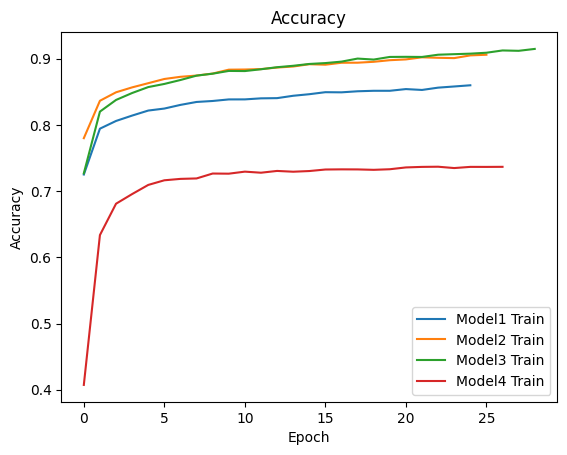

In [56]:
plt.plot(history1.history['accuracy'], label='Model1' + ' Train')
plt.plot(history2.history['accuracy'], label='Model2' + ' Train')
plt.plot(history3.history['accuracy'], label='Model3' + ' Train')
plt.plot(history4.history['accuracy'], label='Model4' + ' Train')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

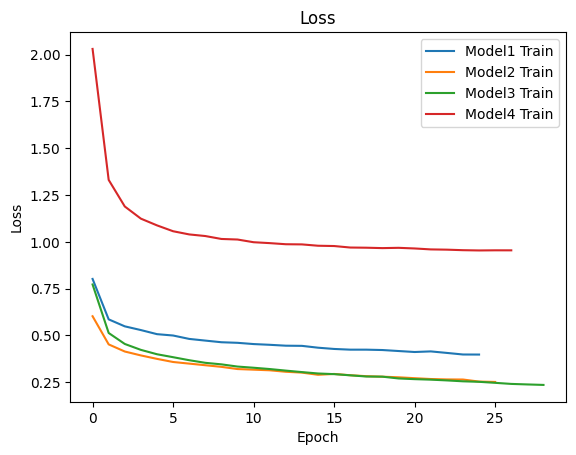

In [57]:
plt.plot(history1.history['loss'], label='Model1' + ' Train')
plt.plot(history2.history['loss'], label='Model2' + ' Train')
plt.plot(history3.history['loss'], label='Model3' + ' Train')
plt.plot(history4.history['loss'], label='Model4' + ' Train')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

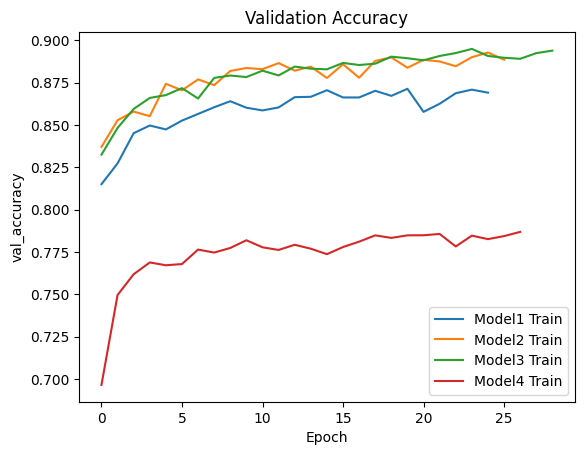

In [58]:
plt.plot(history1.history['val_accuracy'], label='Model1' + ' Train')
plt.plot(history2.history['val_accuracy'], label='Model2' + ' Train')
plt.plot(history3.history['val_accuracy'], label='Model3' + ' Train')
plt.plot(history4.history['val_accuracy'], label='Model4' + ' Train')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

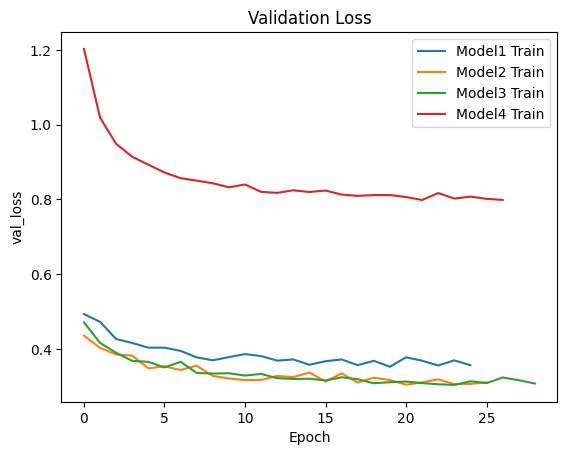

In [59]:
plt.plot(history1.history['val_loss'], label='Model1' + ' Train')
plt.plot(history2.history['val_loss'], label='Model2' + ' Train')
plt.plot(history3.history['val_loss'], label='Model3' + ' Train')
plt.plot(history4.history['val_loss'], label='Model4' + ' Train')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

Third Model is the Best model it has highest accuracy, validation accuracy and least loss, validation loss and best test accuracy